In [1]:
import numpy as np
%matplotlib inline
import lsst.sims.skybrightness as sb

In [2]:
sm = sb.SkyModel(mags=True)

In [3]:
ra = 55.64056042688472
dec = -30.23274831365254
mjd = 59991.02612061111
sm.setRaDecMjd(ra, dec, mjd, degrees=True)

In [4]:
sm.returnMags()

{'g': array([ 21.57930854]),
 'i': array([ 20.03527953]),
 'r': array([ 20.97264383]),
 'u': array([ 21.6312287]),
 'y': array([ 17.89830337]),
 'z': array([ 19.08945578])}

In [5]:
np.degrees(sm.moonAlt), np.degrees(sm.sunAlt)

(-33.2181947264393, -14.443100943436038)

In [6]:
np.degrees(sm.alts)

array([ 65.21173113])

In [7]:
# Offset things slightly just to see.
sm.setRaDecMjd(ra, dec+2., mjd, degrees=True)
sm.returnMags()

{'g': array([ 21.57320736]),
 'i': array([ 20.03080995]),
 'r': array([ 20.96631851]),
 'u': array([ 21.62847696]),
 'y': array([ 17.89545814]),
 'z': array([ 19.08601404])}

In [8]:
import lsst.sims.skybrightness_pre as sb2
import healpy as hp

In [9]:
sm2 = sb2.SkyModelPre()
skymap=sm2.returnMags(mjd)


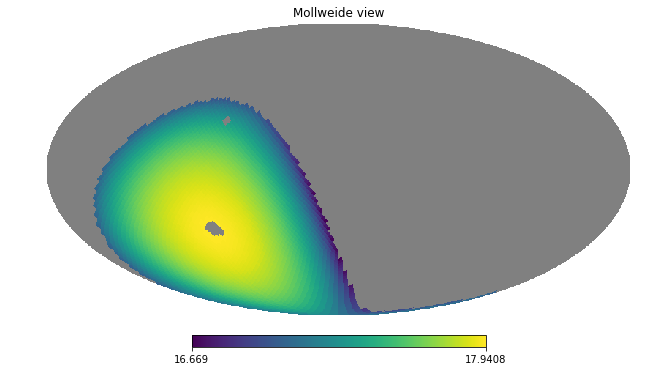

In [10]:
hp.mollview(skymap['y'])

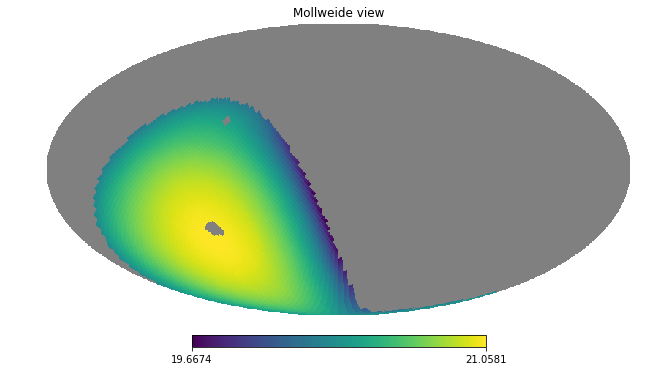

In [11]:
hp.mollview(skymap['r'])